In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_info = pd.read_csv('Ki67ImgInfo.csv')

In [3]:
img_info.head()

,TNEID,ID PATIENT,Code Diag,Origine
0,TNE1925,393,CA,Milan
1,TNE1927,400,CA,Milan
2,TNE1929,492,CT,Milan
3,TNE1931,609,CT,Milan
4,TNE1933,716,CA,Milan


In [4]:
img_info =  img_info.rename(columns={" ID (anonyme)" : "TNEID" })

In [5]:
# tets
rootdir  = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz'
dir_exp = 'TumorNormal_Ki67_model2709_ep_21_40'

In [6]:
def get_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table.csv'
    df_ = pd.read_csv(path_)
    return df_

In [7]:
def get_train_df(rootdir, dir_exp):
    path_ = f'{rootdir}/{dir_exp}/Tumor/results_table_train.csv'
    df_ = pd.read_csv(path_)
    return df_

In [8]:
df = pd.DataFrame()
df_ = get_df(rootdir, dir_exp)
df = df.append(df_)
df['Set'] = ['Test'] * df.shape[0]

In [9]:
df_tr = pd.DataFrame()
df_ = get_train_df(rootdir, dir_exp)
df_tr = df_tr.append(df_)
df_tr['Set'] = ['Train'] * df_tr.shape[0]

In [10]:
df_all = df.append(df_tr)

In [11]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.767511,1.065712,Test
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.114439,1.106141,Test
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.380768,1.464499,Test
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.019160,1.052290,Test
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.498796,1.017020,Test


In [12]:
i = 0
df_all.iloc[i,0].split('/')[-3]

'TNE1720'

In [13]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-3])
df_all['TNEID'] = sample_id

In [14]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-2])
df_all['Class'] = sample_id

In [15]:
mean_train = df_all.loc[(df_all['Set'] == 'Train') , 'MaxScoreAnomalyMap'].mean()
df_all['MSE'] = (mean_train - df_all['MaxScoreAnomalyMap'])**2

In [16]:
df_all.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.767511,1.065712,Test,TNE1720,Normal,0.126613
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.114439,1.106141,Test,TNE1831,Tumoral,0.000079
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.380768,1.464499,Test,TNE1597,Tumoral,0.066270
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.019160,1.052290,Test,TNE1560,Tumoral,0.010853
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.498796,1.017020,Test,TNE1574,Normal,0.390054


In [17]:
img_info.head()

,TNEID,ID PATIENT,Code Diag,Origine
0,TNE1925,393,CA,Milan
1,TNE1927,400,CA,Milan
2,TNE1929,492,CT,Milan
3,TNE1931,609,CT,Milan
4,TNE1933,716,CA,Milan


In [18]:
df_all.index = range(df_all.shape[0])

In [19]:
df_all.loc[df_all['Class']== 'Normal', 'BinaryLabels'] = 0
df_all.loc[df_all['Class']== 'Tumoral', 'BinaryLabels'] = 1

In [20]:
origin = []
for i in range(df_all.shape[0]):
    tne = df_all['TNEID'][i]
    print(tne)
    if tne == 'TNE1512':
        origin.append('Unknown')
    else:
        origin.append(img_info[img_info['TNEID'] == tne]['Origine'].values[0])

TNE1720
TNE1831
TNE1597
TNE1560
TNE1574
TNE2123
TNE1552
TNE1488
TNE1817
TNE1606
TNE1710
TNE1488
TNE1801
TNE1503
TNE1817
TNE2041
TNE1481
TNE1817
TNE2041
TNE1801
TNE1831
TNE1460
TNE1720
TNE1597
TNE1460
TNE1817
TNE1597
TNE1460
TNE1578
TNE2123
TNE1867
TNE1574
TNE1552
TNE1460
TNE1586
TNE1481
TNE1460
TNE1578
TNE1931
TNE1867
TNE2041
TNE1488
TNE2123
TNE1548
TNE1710
TNE1710
TNE1512
TNE1447
TNE1488
TNE1560
TNE1710
TNE1606
TNE1578
TNE1801
TNE1817
TNE1606
TNE1481
TNE1512
TNE1460
TNE1488
TNE1720
TNE1460
TNE1578
TNE1941
TNE1460
TNE1720
TNE1447
TNE2003
TNE1582
TNE1606
TNE1606
TNE1481
TNE1586
TNE1931
TNE1528
TNE1606
TNE1574
TNE2041
TNE1488
TNE1586
TNE1528
TNE1488
TNE1732
TNE1447
TNE1606
TNE1831
TNE2098
TNE1817
TNE1512
TNE1586
TNE1503
TNE2041
TNE1931
TNE1460
TNE1548
TNE1552
TNE1941
TNE1512
TNE1578
TNE1831
TNE2003
TNE1817
TNE1528
TNE1460
TNE1460
TNE2098
TNE1447
TNE1817
TNE1528
TNE1606
TNE1931
TNE1512
TNE1503
TNE2037
TNE1606
TNE2123
TNE1460
TNE1488
TNE1608
TNE1488
TNE1578
TNE2037
TNE1831
TNE1503
TNE1829


TNE1528
TNE1574
TNE1488
TNE1481
TNE2037
TNE1586
TNE2098
TNE1867
TNE1608
TNE1528
TNE1829
TNE1578
TNE1606
TNE2098
TNE1512
TNE1552
TNE1720
TNE1608
TNE1460
TNE1606
TNE2123
TNE1512
TNE1512
TNE1586
TNE1831
TNE1817
TNE2003
TNE2098
TNE2123
TNE1829
TNE1732
TNE1710
TNE1578
TNE1801
TNE1512
TNE1488
TNE1931
TNE2003
TNE1608
TNE1720
TNE1488
TNE1512
TNE2123
TNE1831
TNE1801
TNE1578
TNE1710
TNE1732
TNE1831
TNE1488
TNE1801
TNE1460
TNE2098
TNE1528
TNE1481
TNE1831
TNE1831
TNE1831
TNE1608
TNE2041
TNE1488
TNE1801
TNE1817
TNE1606
TNE1578
TNE1536
TNE1447
TNE1710
TNE1732
TNE1817
TNE1481
TNE1447
TNE1488
TNE1528
TNE1720
TNE1447
TNE1817
TNE2037
TNE2003
TNE1801
TNE1512
TNE1831
TNE1488
TNE1578
TNE2037
TNE1720
TNE1817
TNE1578
TNE2098
TNE1481
TNE1608
TNE1512
TNE1578
TNE2098
TNE1867
TNE1488
TNE1710
TNE1732
TNE1606
TNE1552
TNE1488
TNE2123
TNE1512
TNE1578
TNE1582
TNE1606
TNE1608
TNE2003
TNE1447
TNE1606
TNE1552
TNE2098
TNE1552
TNE2041
TNE1817
TNE1931
TNE1503
TNE1801
TNE1536
TNE1481
TNE1481
TNE1831
TNE1586
TNE1512
TNE2041


TNE1548
TNE1608
TNE1732
TNE1867
TNE1528
TNE1578
TNE1578
TNE1732
TNE1481
TNE1460
TNE2041
TNE1528
TNE1829
TNE1488
TNE1831
TNE1732
TNE1831
TNE1817
TNE1710
TNE1481
TNE1552
TNE1801
TNE1941
TNE2123
TNE1503
TNE1503
TNE1817
TNE1586
TNE1831
TNE1481
TNE1801
TNE1710
TNE1460
TNE1528
TNE2037
TNE1801
TNE1710
TNE1710
TNE1817
TNE1460
TNE1586
TNE1831
TNE1720
TNE2041
TNE1481
TNE1608
TNE1597
TNE1460
TNE2037
TNE1447
TNE1720
TNE1867
TNE1578
TNE1801
TNE1606
TNE1597
TNE1447
TNE1536
TNE1528
TNE1447
TNE1867
TNE2098
TNE1586
TNE2098
TNE1548
TNE2003
TNE1801
TNE1817
TNE1931
TNE1578
TNE1710
TNE1460
TNE1512
TNE1867
TNE1578
TNE1503
TNE1512
TNE1528
TNE1552
TNE1720
TNE1488
TNE2041
TNE1578
TNE1574
TNE1801
TNE1512
TNE1931
TNE1582
TNE2003
TNE1829
TNE1560
TNE1732
TNE1586
TNE1578
TNE1710
TNE1528
TNE2003
TNE1512
TNE1597
TNE1597
TNE1481
TNE1528
TNE2123
TNE1941
TNE1578
TNE2123
TNE1574
TNE1931
TNE1460
TNE1941
TNE2037
TNE1460
TNE1710
TNE2041
TNE2123
TNE1560
TNE1817
TNE1578
TNE1578
TNE1606
TNE2003
TNE1831
TNE1817
TNE1574
TNE1578


TNE1503
TNE1867
TNE1597
TNE1931
TNE1512
TNE2123
TNE2123
TNE1460
TNE1578
TNE1829
TNE1447
TNE1460
TNE1460
TNE1447
TNE1578
TNE2123
TNE1488
TNE1817
TNE1720
TNE1801
TNE1552
TNE1720
TNE1817
TNE1801
TNE1817
TNE1528
TNE1447
TNE1931
TNE1447
TNE1931
TNE2003
TNE1586
TNE1606
TNE2041
TNE1512
TNE1586
TNE1503
TNE1710
TNE1941
TNE1608
TNE1710
TNE1512
TNE1817
TNE1831
TNE1536
TNE1512
TNE1831
TNE2098
TNE1578
TNE1447
TNE2123
TNE2123
TNE1801
TNE1560
TNE1941
TNE1710
TNE1578
TNE2098
TNE1931
TNE1447
TNE1528
TNE2037
TNE2123
TNE1586
TNE1560
TNE1606
TNE1447
TNE1829
TNE1801
TNE1941
TNE1503
TNE1829
TNE1732
TNE2003
TNE1447
TNE1447
TNE1447
TNE1528
TNE2123
TNE1817
TNE1817
TNE2098
TNE1931
TNE1710
TNE1447
TNE2041
TNE1817
TNE1606
TNE1460
TNE1578
TNE1817
TNE1608
TNE2123
TNE1941
TNE1831
TNE1512
TNE1801
TNE2098
TNE1552
TNE1552
TNE1481
TNE2123
TNE1608
TNE2098
TNE1447
TNE1488
TNE1528
TNE1552
TNE1560
TNE1732
TNE2037
TNE1831
TNE1447
TNE1597
TNE1931
TNE1817
TNE1552
TNE1488
TNE1720
TNE1460
TNE1488
TNE1512
TNE1481
TNE1528
TNE1817


TNE1831
TNE1560
TNE1732
TNE1608
TNE1460
TNE1578
TNE1512
TNE1829
TNE1801
TNE1597
TNE1597
TNE1801
TNE1931
TNE2123
TNE1578
TNE1710
TNE2123
TNE1831
TNE2003
TNE2123
TNE1512
TNE1732
TNE1447
TNE1536
TNE2003
TNE1720
TNE1720
TNE1488
TNE1831
TNE1481
TNE1503
TNE1608
TNE1578
TNE2003
TNE1578
TNE1488
TNE1720
TNE2003
TNE2123
TNE1931
TNE1512
TNE2037
TNE1447
TNE1578
TNE2123
TNE1831
TNE1460
TNE1512
TNE1488
TNE1488
TNE1447
TNE1597
TNE1548
TNE1931
TNE1582
TNE1582
TNE1488
TNE1528
TNE1831
TNE1608
TNE1931
TNE1817
TNE1867
TNE1488
TNE2003
TNE1536
TNE1710
TNE1528
TNE2123
TNE2003
TNE2041
TNE1867
TNE1488
TNE1801
TNE1512
TNE1560
TNE1460
TNE2123
TNE1710
TNE1801
TNE1536
TNE1528
TNE1552
TNE1512
TNE1460
TNE1608
TNE1732
TNE1481
TNE1528
TNE1710
TNE2123
TNE2037
TNE1801
TNE2098
TNE1512
TNE1536
TNE1528
TNE2003
TNE1552
TNE1578
TNE1460
TNE1481
TNE1831
TNE1831
TNE1710
TNE1548
TNE1578
TNE1829
TNE1481
TNE1817
TNE1447
TNE1710
TNE1941
TNE1710
TNE1447
TNE1817
TNE1732
TNE1801
TNE1732
TNE2041
TNE2041
TNE1831
TNE1829
TNE1488
TNE1831


TNE2003
TNE1732
TNE1578
TNE1460
TNE1817
TNE1608
TNE1578
TNE1552
TNE1460
TNE1831
TNE1867
TNE1710
TNE1801
TNE1931
TNE1931
TNE1447
TNE1503
TNE2098
TNE1608
TNE1720
TNE2041
TNE1512
TNE1582
TNE1829
TNE1801
TNE2003
TNE1586
TNE2037
TNE1488
TNE1574
TNE1801
TNE1552
TNE1447
TNE1720
TNE2123
TNE1941
TNE1582
TNE1732
TNE1817
TNE2037
TNE1732
TNE1512
TNE2037
TNE1597
TNE1460
TNE1503
TNE1801
TNE2041
TNE1536
TNE1512
TNE1801
TNE1488
TNE1552
TNE1488
TNE1460
TNE1801
TNE1801
TNE1867
TNE1586
TNE1488
TNE1829
TNE1460
TNE1447
TNE1488
TNE1710
TNE1560
TNE1931
TNE1578
TNE1481
TNE2041
TNE1582
TNE1817
TNE1528
TNE1710
TNE1732
TNE1720
TNE1720
TNE1710
TNE2037
TNE1931
TNE1941
TNE1560
TNE1460
TNE2041
TNE1801
TNE1512
TNE1931
TNE1867
TNE1586
TNE1481
TNE1481
TNE1710
TNE1817
TNE1586
TNE1503
TNE2041
TNE1941
TNE1817
TNE1512
TNE1817
TNE1512
TNE1560
TNE1460
TNE1488
TNE1732
TNE1574
TNE1941
TNE1831
TNE1710
TNE1817
TNE2123
TNE1447
TNE1831
TNE1548
TNE1606
TNE1817
TNE1931
TNE1512
TNE1536
TNE1488
TNE1512
TNE2123
TNE1801
TNE1488
TNE2098


TNE1720
TNE1447
TNE1460
TNE1447
TNE1801
TNE1488
TNE1817
TNE1817
TNE2041
TNE1488
TNE1817
TNE1503
TNE1503
TNE1460
TNE1829
TNE1503
TNE1720
TNE1817
TNE1503
TNE2123
TNE1578
TNE1586
TNE1512
TNE1512
TNE1931
TNE1578
TNE1578
TNE1710
TNE1817
TNE1481
TNE1931
TNE1831
TNE1831
TNE1606
TNE1512
TNE1503
TNE1552
TNE1578
TNE1720
TNE2123
TNE1512
TNE1732
TNE1867
TNE1528
TNE1460
TNE1817
TNE1606
TNE1801
TNE1481
TNE1732
TNE1732
TNE1488
TNE2037
TNE1831
TNE1447
TNE1817
TNE1481
TNE1720
TNE1447
TNE1817
TNE1488
TNE1578
TNE2098
TNE1586
TNE2041
TNE1831
TNE1528
TNE1481
TNE1488
TNE1801
TNE1536
TNE1941
TNE1481
TNE1503
TNE1528
TNE1488
TNE1831
TNE1586
TNE1608
TNE1606
TNE1552
TNE2041
TNE1503
TNE2098
TNE1817
TNE1817
TNE1732
TNE1460
TNE1829
TNE1831
TNE1817
TNE1732
TNE1578
TNE1831
TNE1460
TNE1801
TNE1710
TNE1732
TNE1710
TNE1460
TNE1447
TNE1710
TNE1578
TNE1801
TNE1829
TNE1710
TNE1720
TNE1801
TNE1488
TNE1578
TNE2123
TNE1512
TNE1817
TNE1512
TNE1867
TNE1536
TNE1488
TNE1941
TNE1732
TNE1460
TNE1578
TNE1817
TNE1586
TNE1488
TNE1829


TNE1710
TNE1447
TNE2098
TNE1481
TNE1801
TNE1488
TNE2037
TNE1512
TNE1831
TNE1560
TNE1460
TNE1574
TNE1447
TNE1512
TNE1732
TNE1460
TNE2098
TNE2003
TNE1817
TNE1503
TNE1831
TNE1597
TNE1488
TNE1867
TNE2037
TNE1488
TNE1608
TNE1447
TNE1552
TNE1931
TNE1608
TNE1931
TNE1931
TNE2037
TNE1831
TNE1582
TNE1582
TNE2098
TNE1829
TNE1552
TNE1941
TNE1512
TNE1931
TNE1447
TNE1801
TNE1560
TNE1574
TNE1817
TNE1829
TNE1447
TNE2098
TNE1801
TNE1867
TNE1831
TNE1460
TNE2123
TNE1710
TNE1801
TNE1582
TNE1488
TNE2037
TNE1460
TNE1941
TNE1831
TNE1732
TNE1732
TNE1528
TNE1481
TNE1608
TNE1710
TNE2003
TNE1801
TNE1586
TNE1447
TNE2003
TNE1488
TNE2003
TNE1560
TNE1528
TNE1512
TNE1801
TNE1536
TNE1503
TNE1801
TNE1560
TNE2123
TNE1586
TNE1447
TNE1586
TNE1931
TNE1460
TNE1460
TNE1512
TNE2098
TNE1931
TNE1608
TNE1512
TNE1732
TNE1560
TNE1801
TNE1488
TNE1512
TNE1710
TNE1831
TNE1801
TNE1608
TNE2123
TNE1552
TNE2041
TNE1512
TNE1586
TNE1512
TNE1447
TNE1608
TNE1710
TNE1460
TNE1460
TNE1829
TNE1606
TNE1931
TNE2123
TNE2098
TNE1447
TNE1578
TNE1582


TNE1460
TNE1710
TNE1829
TNE1586
TNE1503
TNE2098
TNE2123
TNE1460
TNE1867
TNE1831
TNE1528
TNE2003
TNE1829
TNE1867
TNE2003
TNE1829
TNE1447
TNE1941
TNE1801
TNE1817
TNE1582
TNE1460
TNE1608
TNE1503
TNE1608
TNE1460
TNE1606
TNE1578
TNE1460
TNE2123
TNE1732
TNE1503
TNE2123
TNE2098
TNE1460
TNE1447
TNE1817
TNE1481
TNE1586
TNE1586
TNE1606
TNE1720
TNE1481
TNE1732
TNE1512
TNE1608
TNE1931
TNE1512
TNE1528
TNE1582
TNE1829
TNE1512
TNE1867
TNE1732
TNE2037
TNE2041
TNE1710
TNE1817
TNE1732
TNE1536
TNE1931
TNE2098
TNE1931
TNE2098
TNE1460
TNE1548
TNE1528
TNE1606
TNE1528
TNE2123
TNE1710
TNE2123
TNE1941
TNE1817
TNE1488
TNE1512
TNE1548
TNE1597
TNE2123
TNE1801
TNE1460
TNE1801
TNE1867
TNE1578
TNE1460
TNE1460
TNE1710
TNE1460
TNE1608
TNE1578
TNE2003
TNE1931
TNE1460
TNE1931
TNE1732
TNE1829
TNE1608
TNE1801
TNE1528
TNE1817
TNE1528
TNE1941
TNE1488
TNE1512
TNE1552
TNE1503
TNE1597
TNE1512
TNE1586
TNE1829
TNE1817
TNE1710
TNE1528
TNE1831
TNE1606
TNE1931
TNE1931
TNE1817
TNE2098
TNE1460
TNE1817
TNE1831
TNE1720
TNE1817
TNE1941


TNE1871
TNE1710
TNE1875
TNE1949
TNE1877
TNE1460
TNE1881
TNE1544
TNE1481
TNE1883
TNE1526
TNE1817
TNE1503
TNE1503
TNE1875
TNE1548
TNE1606
TNE1925
TNE1538
TNE1538
TNE1552
TNE2037
TNE1597
TNE1552
TNE1883
TNE1815
TNE1512
TNE1877
TNE1488
TNE1526
TNE1526
TNE1873
TNE1686
TNE1538
TNE1704
TNE1447
TNE1447
TNE2003
TNE1941
TNE1827
TNE1887
TNE1887
TNE1975
TNE1893
TNE2037
TNE1574
TNE1460
TNE2003
TNE1544
TNE1887
TNE1576
TNE1526
TNE1544
TNE1528
TNE1877
TNE1742
TNE1883
TNE1686
TNE1867
TNE2003
TNE1831
TNE1887
TNE1875
TNE1528
TNE1835
TNE1597
TNE2037
TNE1526
TNE1941
TNE1503
TNE1732
TNE1975
TNE1704
TNE1536
TNE1875
TNE1801
TNE1929
TNE1871
TNE1538
TNE1704
TNE1686
TNE1941
TNE1732
TNE1867
TNE1548
TNE1875
TNE2159
TNE1877
TNE1875
TNE1929
TNE1931
TNE1949
TNE1582
TNE1542
TNE1538
TNE1875
TNE1544
TNE1481
TNE1516
TNE1893
TNE2003
TNE1881
TNE1690
TNE1690
TNE1949
TNE1959
TNE1552
TNE1867
TNE1831
TNE1576
TNE1560
TNE1959
TNE1466
TNE1447
TNE1883
TNE1831
TNE1516
TNE1686
TNE1528
TNE2003
TNE1815
TNE1606
TNE2159
TNE1871
TNE1883


TNE1542
TNE1817
TNE1815
TNE1488
TNE1881
TNE2041
TNE1887
TNE1732
TNE2037
TNE1597
TNE2041
TNE1941
TNE1742
TNE1597
TNE1881
TNE2041
TNE2159
TNE1877
TNE1720
TNE1608
TNE1720
TNE1710
TNE1576
TNE1586
TNE1871
TNE2003
TNE1488
TNE2003
TNE1855
TNE1560
TNE1889
TNE1560
TNE1538
TNE1835
TNE1576
TNE1481
TNE2098
TNE1608
TNE1488
TNE1538
TNE2003
TNE1503
TNE1941
TNE1815
TNE1941
TNE1889
TNE1887
TNE2037
TNE1544
TNE1576
TNE1931
TNE1925
TNE1516
TNE1542
TNE1690
TNE1608
TNE1447
TNE1538
TNE1975
TNE1560
TNE1552
TNE1552
TNE1538
TNE1542
TNE1815
TNE1548
TNE1835
TNE2041
TNE1542
TNE1855
TNE1481
TNE1815
TNE1586
TNE1742
TNE1512
TNE1829
TNE1512
TNE1582
TNE1578
TNE1606
TNE1975
TNE2159
TNE1817
TNE1871
TNE1710
TNE1720
TNE1578
TNE1829
TNE1867
TNE1873
TNE1887
TNE1576
TNE1871
TNE1881
TNE1893
TNE1526
TNE1710
TNE1831
TNE1576
TNE1544
TNE1516
TNE1929
TNE1873
TNE1887
TNE1875
TNE1877
TNE1889
TNE1831
TNE1817
TNE2003
TNE1704
TNE1582
TNE1538
TNE1481
TNE1536
TNE1578
TNE1606
TNE2003
TNE1831
TNE1526
TNE1829
TNE1574
TNE1608
TNE1929
TNE1871


TNE1742
TNE1481
TNE1548
TNE1877
TNE1552
TNE1481
TNE1835
TNE1538
TNE1466
TNE1460
TNE1829
TNE1855
TNE1855
TNE1560
TNE1855
TNE1893
TNE1608
TNE1516
TNE2041
TNE1582
TNE1576
TNE1925
TNE1873
TNE1893
TNE1548
TNE1877
TNE2003
TNE1925
TNE1576
TNE1578
TNE1516
TNE1582
TNE1538
TNE1815
TNE1817
TNE1710
TNE1949
TNE1877
TNE1512
TNE1686
TNE1732
TNE1536
TNE1481
TNE1574
TNE1959
TNE2098
TNE1875
TNE1503
TNE1925
TNE1742
TNE1576
TNE1875
TNE1544
TNE1887
TNE2098
TNE1548
TNE1873
TNE1925
TNE1704
TNE1526
TNE1526
TNE2159
TNE1829
TNE1959
TNE1710
TNE1576
TNE1835
TNE1542
TNE1835
TNE1827
TNE1536
TNE1542
TNE2037
TNE1949
TNE1941
TNE1460
TNE1460
TNE1576
TNE1686
TNE1548
TNE1512
TNE1829
TNE1516
TNE1817
TNE1959
TNE1548
TNE2159
TNE1574
TNE1548
TNE1460
TNE1883
TNE1829
TNE1512
TNE1877
TNE1526
TNE2003
TNE2159
TNE1877
TNE2003
TNE1560
TNE1606
TNE1801
TNE1835
TNE1542
TNE1704
TNE1710
TNE1875
TNE1893
TNE1975
TNE1815
TNE2003
TNE1720
TNE1877
TNE2159
TNE1827
TNE1975
TNE1552
TNE1516
TNE1831
TNE1576
TNE2159
TNE1582
TNE1931
TNE1503
TNE1829


TNE1608
TNE1536
TNE1552
TNE1544
TNE1586
TNE1576
TNE1582
TNE1538
TNE1516
TNE1606
TNE1975
TNE1447
TNE1536
TNE1606
TNE2098
TNE1606
TNE1538
TNE1526
TNE1949
TNE1801
TNE1538
TNE1576
TNE1827
TNE1883
TNE1720
TNE1512
TNE1829
TNE1867
TNE1582
TNE1578
TNE1887
TNE1835
TNE1538
TNE1542
TNE1929
TNE2037
TNE1538
TNE1538
TNE1871
TNE1959
TNE1875
TNE1690
TNE1889
TNE1516
TNE1516
TNE1871
TNE2159
TNE1875
TNE1526
TNE1867
TNE1875
TNE1526
TNE1512
TNE1931
TNE1516
TNE1560
TNE1873
TNE1877
TNE1690
TNE1526
TNE1720
TNE1576
TNE1526
TNE1542
TNE1538
TNE1855
TNE1536
TNE2037
TNE1544
TNE1815
TNE1875
TNE1686
TNE1606
TNE1949
TNE1481
TNE1829
TNE1875
TNE1873
TNE1889
TNE1873
TNE1893
TNE1690
TNE1883
TNE1975
TNE1574
TNE1881
TNE1881
TNE1829
TNE1447
TNE1710
TNE1466
TNE1801
TNE1516
TNE2159
TNE1538
TNE1690
TNE1867
TNE1544
TNE1975
TNE1460
TNE1732
TNE1959
TNE1925
TNE1959
TNE1576
TNE1466
TNE1931
TNE1873
TNE1831
TNE1526
TNE1686
TNE1941
TNE1582
TNE1720
TNE1526
TNE1686
TNE2003
TNE1538
TNE1875
TNE1542
TNE1835
TNE1887
TNE1586
TNE1704
TNE1512


TNE1536
TNE1835
TNE1875
TNE1887
TNE1582
TNE1827
TNE1835
TNE1959
TNE1481
TNE1538
TNE1975
TNE1871
TNE1460
TNE1867
TNE1526
TNE1815
TNE1538
TNE1801
TNE1710
TNE2159
TNE1460
TNE1578
TNE1941
TNE1578
TNE1512
TNE1732
TNE1488
TNE1544
TNE1536
TNE1690
TNE1512
TNE1516
TNE1975
TNE1829
TNE2041
TNE1544
TNE1925
TNE1503
TNE1542
TNE2037
TNE2098
TNE1881
TNE1855
TNE1526
TNE1704
TNE1815
TNE1893
TNE1560
TNE1586
TNE1883
TNE1742
TNE1460
TNE1867
TNE1542
TNE1690
TNE1855
TNE1466
TNE1574
TNE1827
TNE1686
TNE1925
TNE1941
TNE1855
TNE1831
TNE2037
TNE1704
TNE1881
TNE1538
TNE1815
TNE1586
TNE1941
TNE1488
TNE1975
TNE1597
TNE1597
TNE1881
TNE1542
TNE1704
TNE1608
TNE1931
TNE1503
TNE1742
TNE1929
TNE1883
TNE1875
TNE2003
TNE1925
TNE2098
TNE1875
TNE1931
TNE1586
TNE1867
TNE1867
TNE1548
TNE1855
TNE1704
TNE1544
TNE2003
TNE1516
TNE2098
TNE1887
TNE1815
TNE1552
TNE1883
TNE1732
TNE1606
TNE1686
TNE1548
TNE1929
TNE1528
TNE1720
TNE1582
TNE1835
TNE1829
TNE1544
TNE1536
TNE1488
TNE1873
TNE1941
TNE1835
TNE1742
TNE1686
TNE1931
TNE1576
TNE2041


TNE1582
TNE1582
TNE1875
TNE1720
TNE1949
TNE1827
TNE1875
TNE1710
TNE1855
TNE1855
TNE1447
TNE1801
TNE1526
TNE1608
TNE1829
TNE1732
TNE1481
TNE1875
TNE1548
TNE1887
TNE1855
TNE1576
TNE1871
TNE1887
TNE1512
TNE1542
TNE1877
TNE1875
TNE1877
TNE2041
TNE1887
TNE1827
TNE1877
TNE2159
TNE1542
TNE1817
TNE1829
TNE1586
TNE1686
TNE1827
TNE1460
TNE2041
TNE1503
TNE1686
TNE1801
TNE1883
TNE1732
TNE1536
TNE2159
TNE1873
TNE1560
TNE1488
TNE1875
TNE1538
TNE1574
TNE1801
TNE1526
TNE1871
TNE1831
TNE1883
TNE1586
TNE1925
TNE1544
TNE1576
TNE1503
TNE1829
TNE1516
TNE1975
TNE1544
TNE1516
TNE1560
TNE1542
TNE1887
TNE1576
TNE1608
TNE1503
TNE1544
TNE1690
TNE1732
TNE1871
TNE1867
TNE1704
TNE1925
TNE1576
TNE1576
TNE1488
TNE1883
TNE1526
TNE1710
TNE1536
TNE1875
TNE1867
TNE1835
TNE1516
TNE1578
TNE2041
TNE1528
TNE1516
TNE1829
TNE1597
TNE1831
TNE1925
TNE2159
TNE1578
TNE1526
TNE1552
TNE1871
TNE1526
TNE1855
TNE1817
TNE1544
TNE1720
TNE1690
TNE1552
TNE1560
TNE1690
TNE1881
TNE1855
TNE2037
TNE1817
TNE1877
TNE1608
TNE1690
TNE1742
TNE1871


TNE1538
TNE1538
TNE1710
TNE1538
TNE1512
TNE1875
TNE1877
TNE1503
TNE1815
TNE1538
TNE1608
TNE1815
TNE1503
TNE1526
TNE1887
TNE1829
TNE1560
TNE1608
TNE1881
TNE1606
TNE1829
TNE1875
TNE1893
TNE1578
TNE1574
TNE1538
TNE1488
TNE1704
TNE1576
TNE1975
TNE1548
TNE1871
TNE1877
TNE2159
TNE1576
TNE1875
TNE1608
TNE1925
TNE1929
TNE1512
TNE1877
TNE1893
TNE1801
TNE1827
TNE1574
TNE1516
TNE1538
TNE1867
TNE1889
TNE1538
TNE1871
TNE1512
TNE1560
TNE1732
TNE1867
TNE1597
TNE1538
TNE1931
TNE1606
TNE1827
TNE1538
TNE1877
TNE1516
TNE1889
TNE1931
TNE1538
TNE2037
TNE1576
TNE1447
TNE1516
TNE1949
TNE1959
TNE1732
TNE2098
TNE1883
TNE1720
TNE1877
TNE1875
TNE2159
TNE1732
TNE1576
TNE1959
TNE1925
TNE1931
TNE1690
TNE1873
TNE1889
TNE2098
TNE1690
TNE1516
TNE1538
TNE1512
TNE2003
TNE1606
TNE1887
TNE1883
TNE1576
TNE1871
TNE1704
TNE1931
TNE1893
TNE1817
TNE1893
TNE1855
TNE1516
TNE2159
TNE1931
TNE1893
TNE1893
TNE1488
TNE1586
TNE1466
TNE1881
TNE1582
TNE1538
TNE1875
TNE1949
TNE1578
TNE1608
TNE1815
TNE1516
TNE1929
TNE1538
TNE1877
TNE1576


TNE1929
TNE1544
TNE1542
TNE1548
TNE1889
TNE1835
TNE2098
TNE1552
TNE1881
TNE1538
TNE1827
TNE1881
TNE1835
TNE1827
TNE1526
TNE1544
TNE1538
TNE1576
TNE1466
TNE1887
TNE1877
TNE2003
TNE1925
TNE1536
TNE1526
TNE1871
TNE2041
TNE1548
TNE1831
TNE1503
TNE1925
TNE2159
TNE1831
TNE1488
TNE1466
TNE2037
TNE1542
TNE1887
TNE1488
TNE1526
TNE1528
TNE1597
TNE1574
TNE1893
TNE1503
TNE1829
TNE1447
TNE1488
TNE1949
TNE1720
TNE1542
TNE1488
TNE1704
TNE1576
TNE1538
TNE1526
TNE1827
TNE1871
TNE1606
TNE1516
TNE1552
TNE1931
TNE1877
TNE1466
TNE1560
TNE2159
TNE1710
TNE1704
TNE1949
TNE1576
TNE1877
TNE1538
TNE1889
TNE1875
TNE1481
TNE1544
TNE1829
TNE1929
TNE1526
TNE1732
TNE1835
TNE1801
TNE1560
TNE1608
TNE1855
TNE1877
TNE1548
TNE1526
TNE1720
TNE1526
TNE1538
TNE1538
TNE2037
TNE1544
TNE1835
TNE1578
TNE1877
TNE1526
TNE1704
TNE1544
TNE1732
TNE1548
TNE1931
TNE1466
TNE1542
TNE1586
TNE1544
TNE1877
TNE1538
TNE1582
TNE1460
TNE1867
TNE1875
TNE2098
TNE1538
TNE1538
TNE1931
TNE1929
TNE1817
TNE1542
TNE1544
TNE1889
TNE1576
TNE1710
TNE1686


TNE1867
TNE1576
TNE1887
TNE1959
TNE1720
TNE1941
TNE1560
TNE1690
TNE1975
TNE1883
TNE1873
TNE1586
TNE1542
TNE1460
TNE1941
TNE1686
TNE1829
TNE1732
TNE1552
TNE1544
TNE1893
TNE1488
TNE1516
TNE1873
TNE1447
TNE1835
TNE1720
TNE1516
TNE1466
TNE1829
TNE1835
TNE1606
TNE1608
TNE1481
TNE1512
TNE2041
TNE1552
TNE1925
TNE1929
TNE1586
TNE1578
TNE1883
TNE1503
TNE1817
TNE1686
TNE1538
TNE1582
TNE1875
TNE2159
TNE1536
TNE1873
TNE2003
TNE1544
TNE1606
TNE1710
TNE1488
TNE1720
TNE1941
TNE2037
TNE1538
TNE1582
TNE1512
TNE1526
TNE1925
TNE1855
TNE1597
TNE1817
TNE2041
TNE2159
TNE1542
TNE1875
TNE1481
TNE1690
TNE1574
TNE1925
TNE1742
TNE1710
TNE1883
TNE1578
TNE1871
TNE1732
TNE1941
TNE1560
TNE1466
TNE1720
TNE1732
TNE1481
TNE1893
TNE1949
TNE1512
TNE1578
TNE1815
TNE1827
TNE1742
TNE1690
TNE1801
TNE1516
TNE1538
TNE1704
TNE1481
TNE1893
TNE1893
TNE1460
TNE1889
TNE1608
TNE1710
TNE1827
TNE1528
TNE1855
TNE1704
TNE1959
TNE1536
TNE1528
TNE1877
TNE1873
TNE2159
TNE1883
TNE1542
TNE1931
TNE1526
TNE1710
TNE1925
TNE1582
TNE1929
TNE2098


In [21]:
df_all['Origin'] = origin

In [22]:
df_all = df_all[df_all['TNEID'] != 'TNE1582']

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

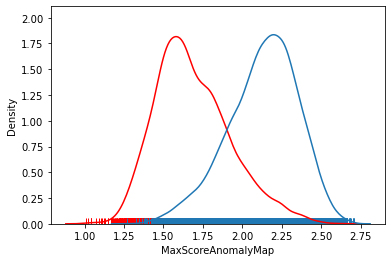

In [23]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

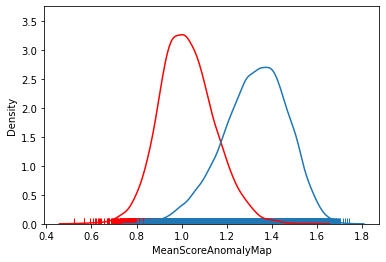

In [24]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MSE', ylabel='Density'>

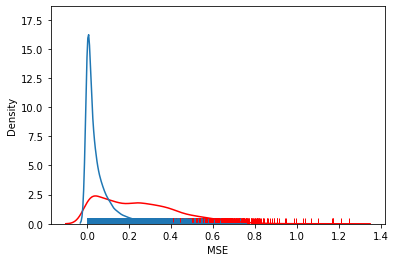

In [25]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumoral']
sns.distplot(dfNormal['MSE'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MSE'], hist=False, rug=True)

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

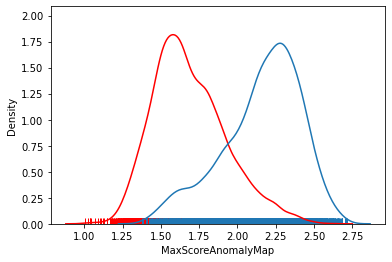

In [26]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

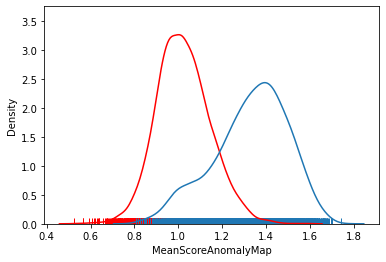

In [27]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumoral']
sns.distplot(dfNorm['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

In [28]:
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap']))
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap']))
print(1- roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MSE']))

0.8971986388716358
0.9146363914330734
0.8108401792819984


In [29]:
set(df_all_test[df_all_test['Set'] == 'Test']['TNEID'])

{'TNE1447',
 'TNE1460',
 'TNE1481',
 'TNE1488',
 'TNE1503',
 'TNE1512',
 'TNE1528',
 'TNE1536',
 'TNE1548',
 'TNE1552',
 'TNE1560',
 'TNE1574',
 'TNE1578',
 'TNE1586',
 'TNE1597',
 'TNE1606',
 'TNE1608',
 'TNE1710',
 'TNE1720',
 'TNE1732',
 'TNE1801',
 'TNE1817',
 'TNE1829',
 'TNE1831',
 'TNE1867',
 'TNE1931',
 'TNE1941',
 'TNE2003',
 'TNE2037',
 'TNE2041',
 'TNE2098',
 'TNE2123'}

In [30]:
tne_l =[]
ori_l = []
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    tne_l.append(tne)
    ori_l.append(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    nb_tumor.append(df_all_test_tne[df_all_test_tne['Class'] == 'Tumoral'].shape[0])
    print('Max ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
  
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['TNEID'] = tne_l
roc_table['Origin'] = ori_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean

roc_table.to_csv('roc_table_tumor_normal.csv')

TNEID =  TNE2003
Normal  175
Tumor  51
Max  0.9733333333333333
MEan  0.9936134453781512
############################### 

TNEID =  TNE1512
Normal  318
Tumor  158
Max  0.9838388663322983
MEan  0.9992834965369
############################### 

TNEID =  TNE1488
Normal  420
Tumor  40
Max  0.9925
MEan  0.999702380952381
############################### 

TNEID =  TNE1574
Normal  50
Tumor  30
Max  0.6933333333333332
MEan  0.7986666666666666
############################### 

TNEID =  TNE1548
Normal  50
Tumor  36
Max  0.9894444444444445
MEan  1.0
############################### 

TNEID =  TNE1606
Normal  166
Tumor  66
Max  0.8090543994158452
MEan  0.9391201168309602
############################### 

TNEID =  TNE1560
Normal  50
Tumor  122
Max  0.7178688524590164
MEan  0.7508196721311475
############################### 

TNEID =  TNE1710
Normal  271
Tumor  75
Max  0.9313161131611316
MEan  0.915079950799508
############################### 

TNEID =  TNE1528
Normal  291
Tumor  34
Max  0.89852435819

In [31]:
roc_table.head()

,TNEID,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,TNE2003,Oslo,175,51,0.973333,0.993613
1,TNE1512,Unknown,318,158,0.983839,0.999283
2,TNE1488,Turin,420,40,0.992500,0.999702
3,TNE1574,Caen,50,30,0.693333,0.798667
4,TNE1548,Caen,50,36,0.989444,1.000000


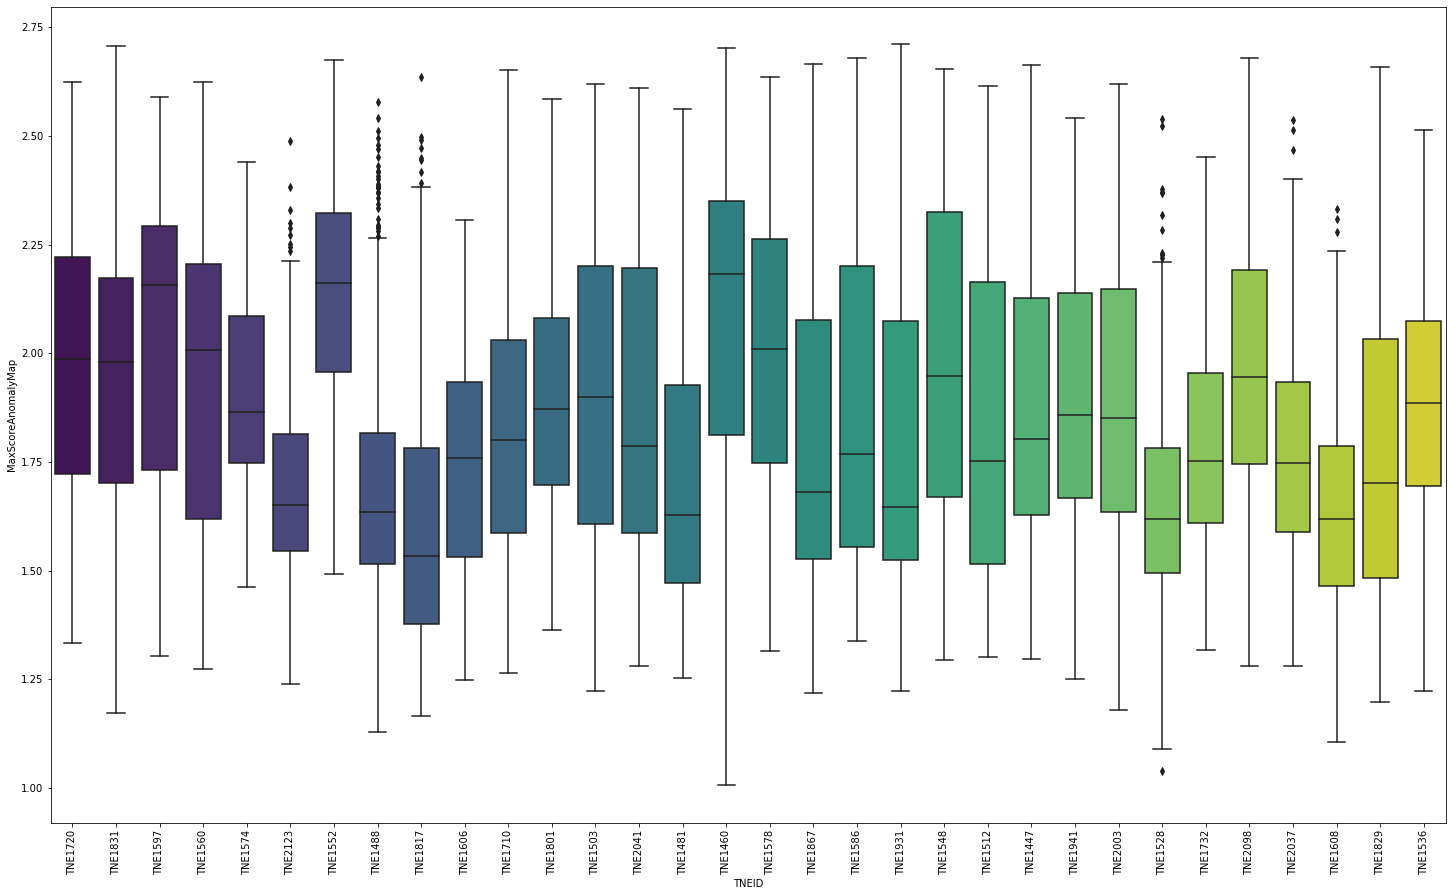

In [32]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

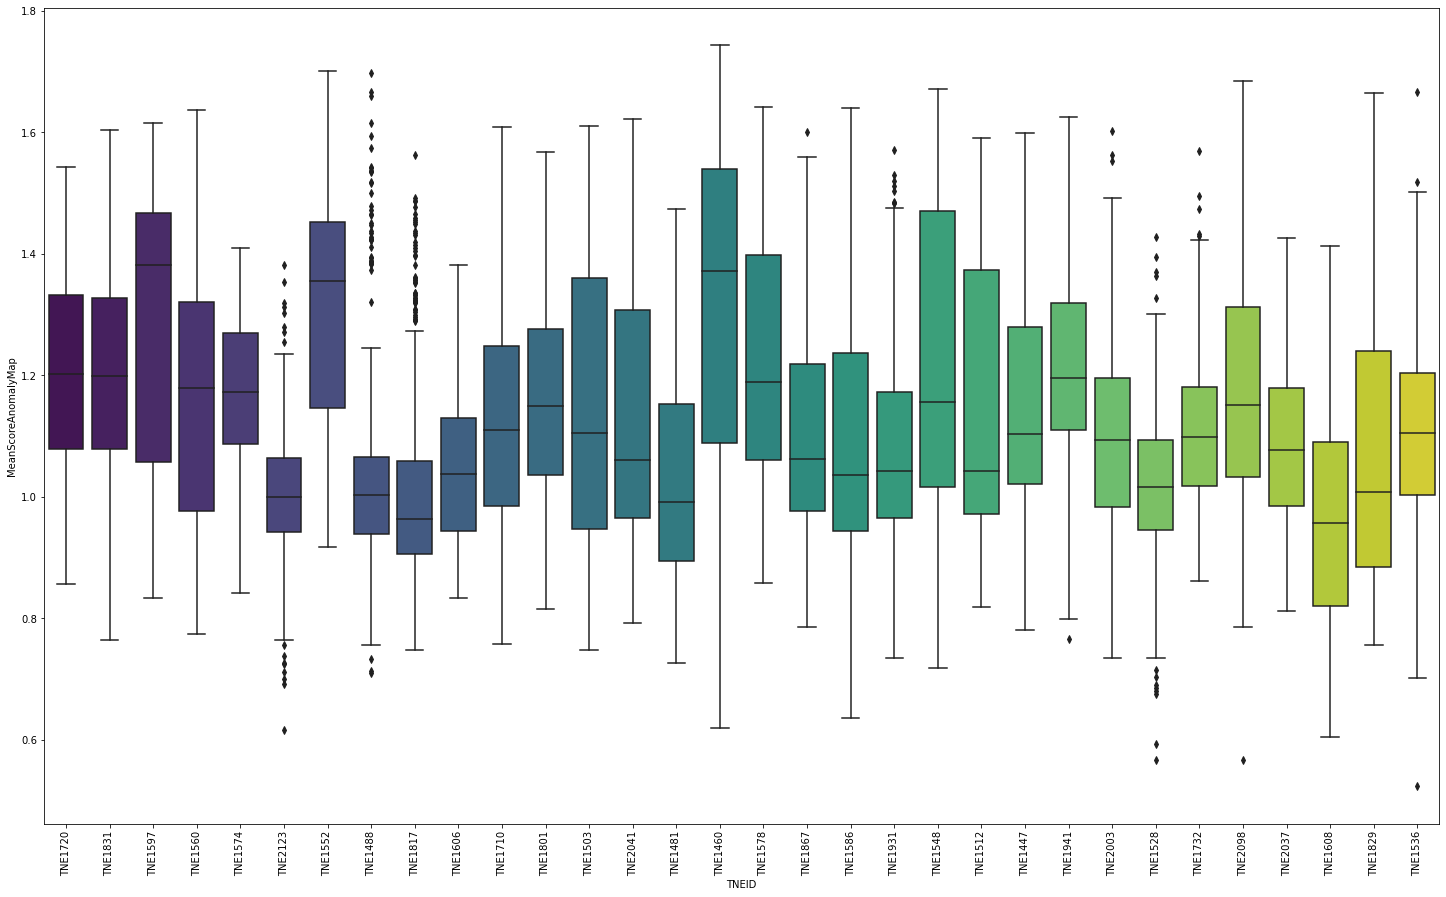

In [33]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

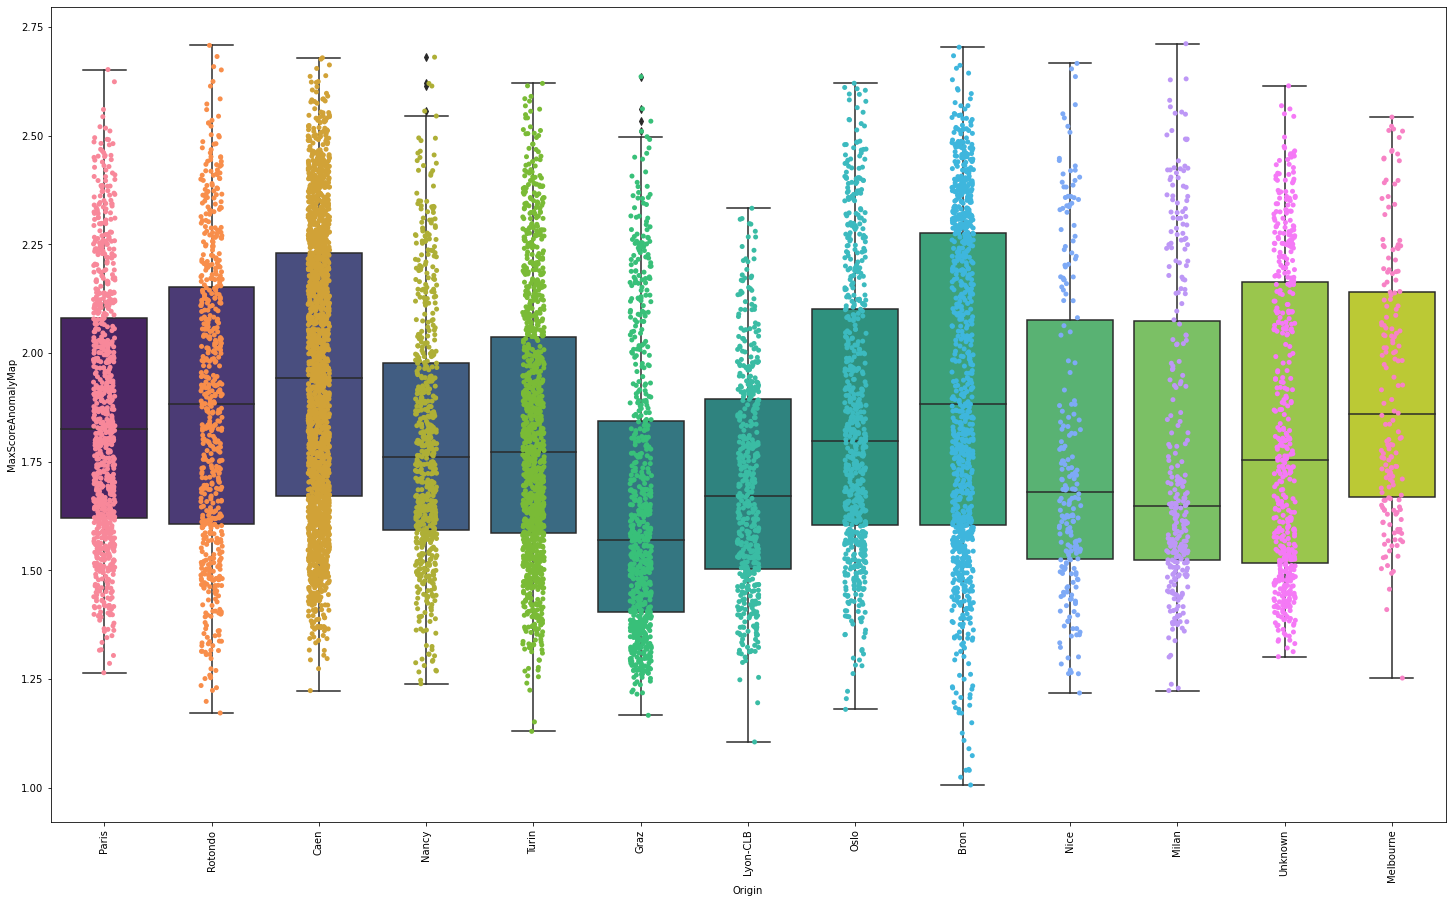

In [34]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MaxScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

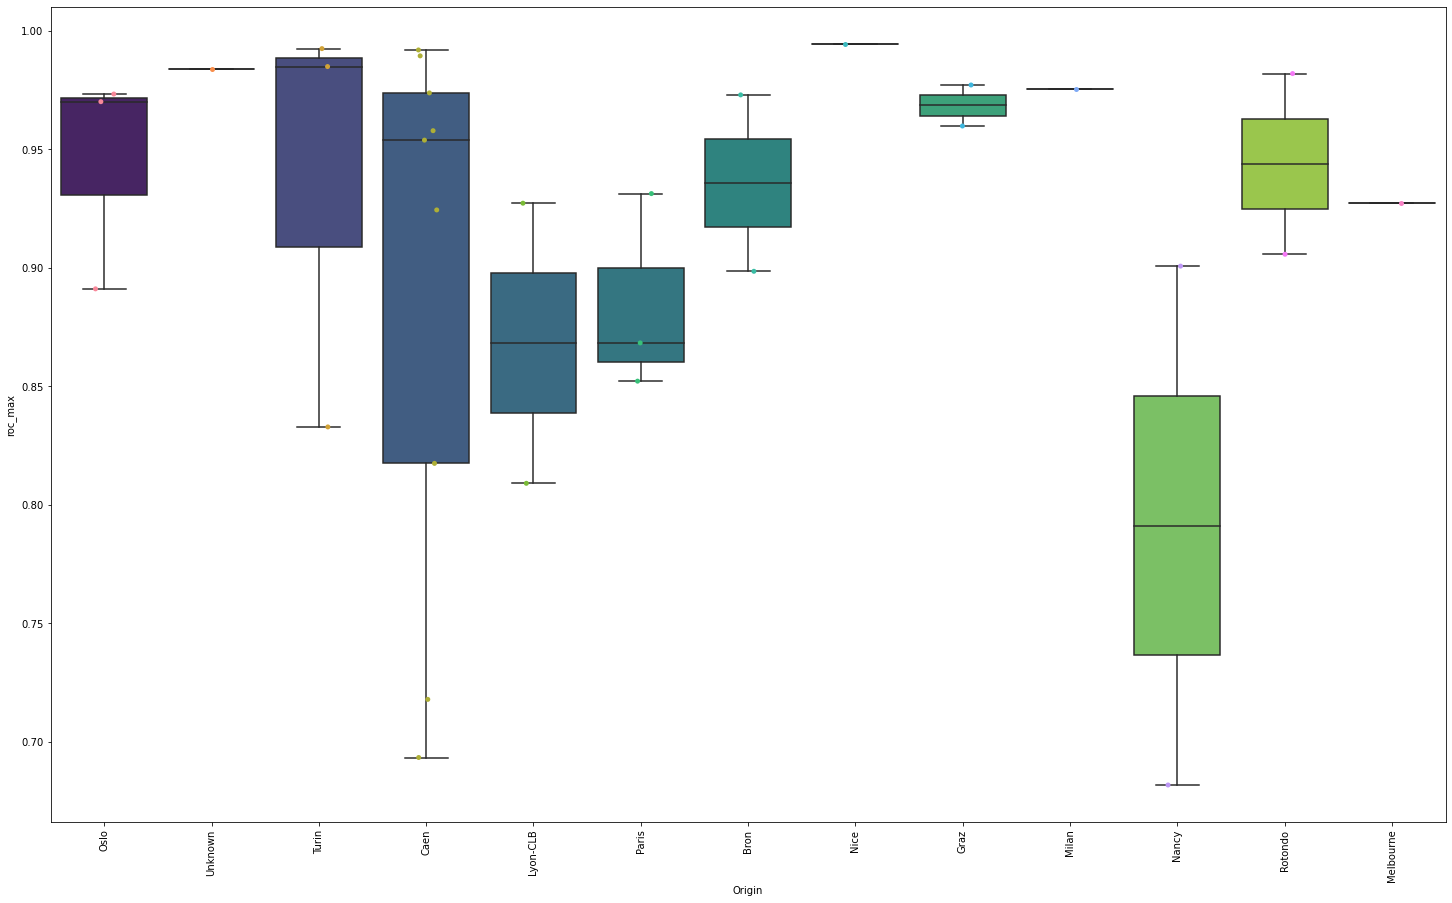

In [35]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_max'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_max",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

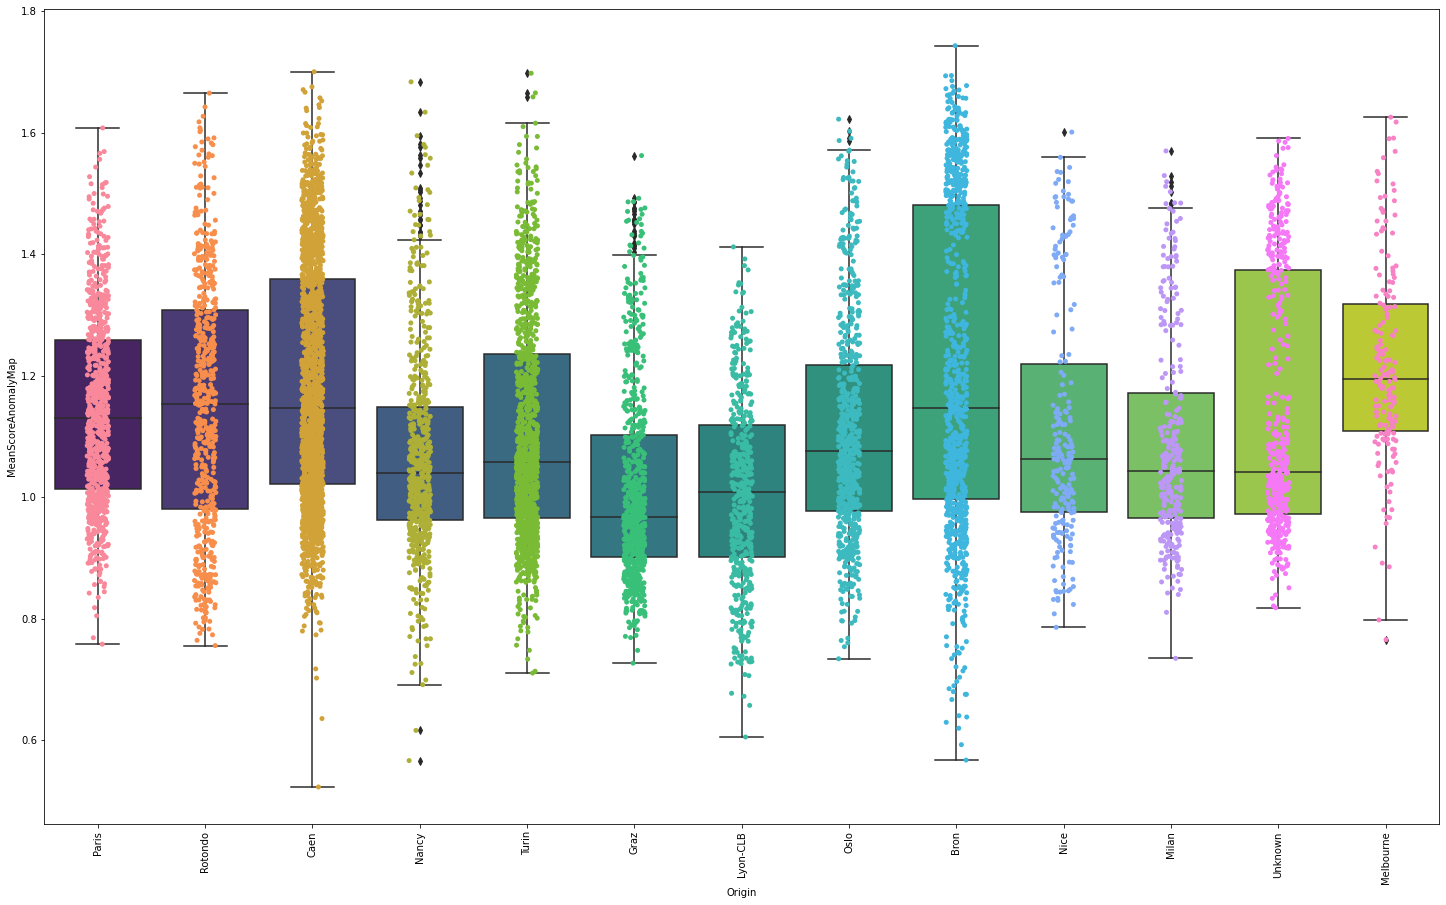

In [36]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MeanScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

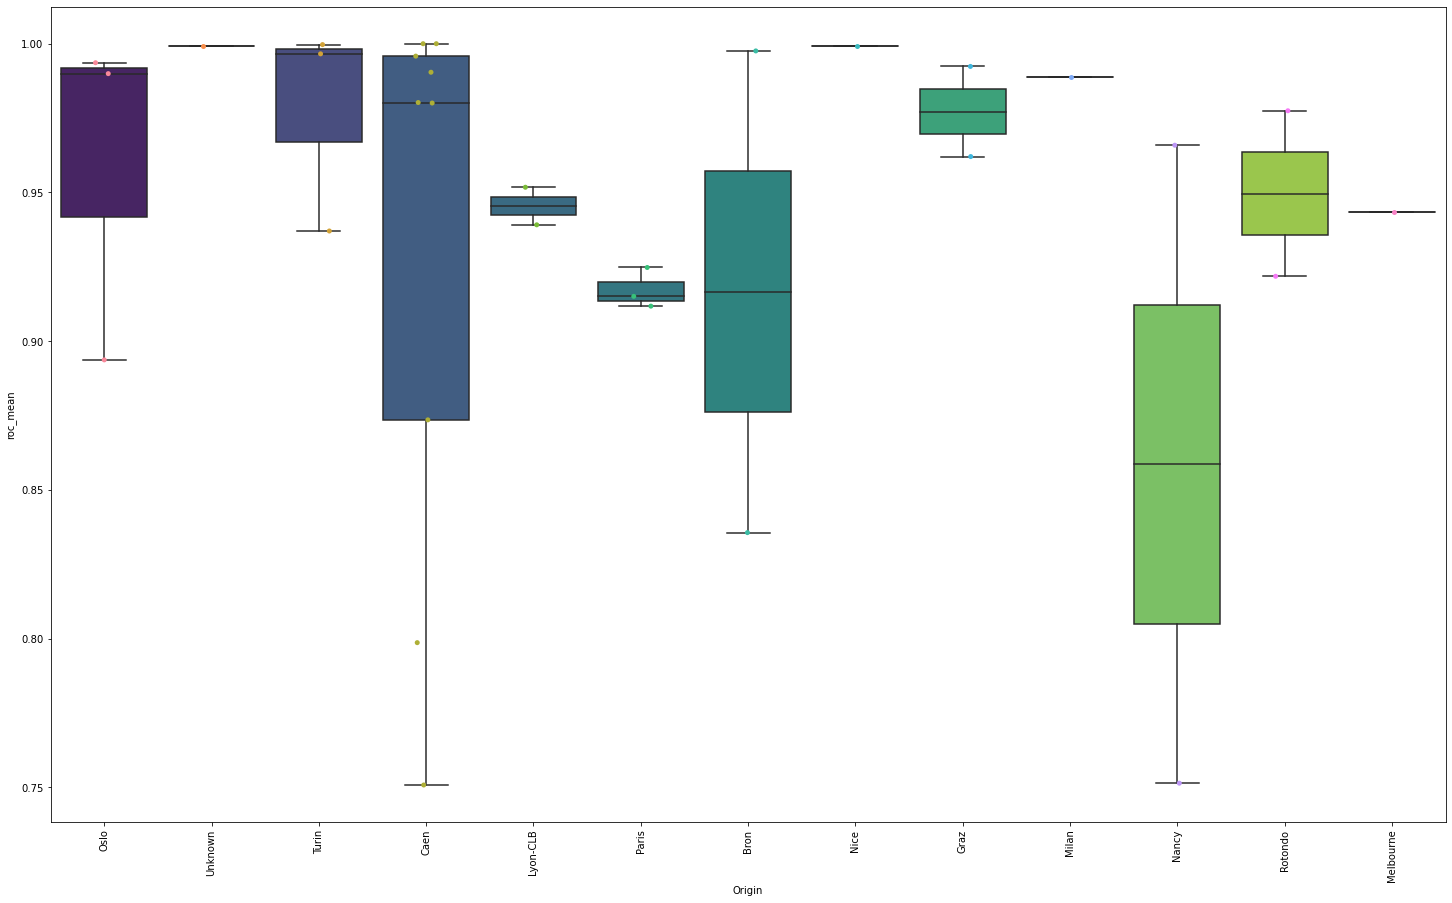

In [37]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_mean'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_mean",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

In [38]:
origin_l =[]
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
roc_loss = []
roc_max_div_loss = []
for ori in set(df_all_test[df_all_test['Set'] == 'Test']['Origin']):
    print('Origin = ', ori)
    origin_l.append(ori)
    df_all_ori = df_all_test[(df_all_test['Origin'] == ori)]
    print('Normal ', df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_ori[df_all_ori['Class'] == 'Tumoral'].shape[0])
    nb_tumor.append(df_all_ori[df_all_ori['Class'] == 'Tumoral'].shape[0])
    print('Max ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
   
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['Origin'] = origin_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean


Origin =  Graz
Normal  561
Tumor  145
Max  0.9701149425287356
MEan  0.9815231421722295
############################### 

Origin =  Paris
Normal  616
Tumor  234
Max  0.8925449550449549
MEan  0.9175407925407925
############################### 

Origin =  Caen
Normal  1058
Tumor  885
Max  0.888933388869309
MEan  0.9185201798511209
############################### 

Origin =  Milan
Normal  228
Tumor  66
Max  0.9754784688995215
MEan  0.9887692716640085
############################### 

Origin =  Nancy
Normal  299
Tumor  338
Max  0.5822564366428529
MEan  0.6257841720923789
############################### 

Origin =  Unknown
Normal  318
Tumor  158
Max  0.9838388663322983
MEan  0.9992834965369
############################### 

Origin =  Melbourne
Normal  113
Tumor  57
Max  0.927495730476634
MEan  0.943487036174507
############################### 

Origin =  Nice
Normal  170
Tumor  52
Max  0.9945701357466064
MEan  0.9992081447963801
############################### 

Origin =  Bron
Normal  565
Tu

In [39]:
roc_table

,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,Graz,561,145,0.970115,0.981523
1,Paris,616,234,0.892545,0.917541
2,Caen,1058,885,0.888933,0.918520
3,Milan,228,66,0.975478,0.988769
4,Nancy,299,338,0.582256,0.625784
5,Unknown,318,158,0.983839,0.999283
6,Melbourne,113,57,0.927496,0.943487
7,Nice,170,52,0.994570,0.999208
8,Bron,565,335,0.970524,0.975079
9,Lyon-CLB,339,138,0.861720,0.942285


In [40]:
threshold = np.linspace(np.min(df_all_test['MeanScoreAnomalyMap']), np.max(df_all_test['MeanScoreAnomalyMap']), 500)
precision_list = []
recall_list = []
f1_list = []
roc_list = []
FPR_list = []
TPR_list = []
specifity_list = []
sensitivity_list = []
print(len(threshold))
#df_299 = df_299[(df_299['TNEID'] == 'TNE0001') | (df_299['TNEID'] == 'TNE0803')]
df_MaxAnomalyScore = df_all_test['MeanScoreAnomalyMap']
df_exp_label = df_all_test['BinaryLabels']
for j in range(len(threshold)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    emp_label = []

    for i in range(df_all_test.shape[0]):
        MSEFM = df_MaxAnomalyScore.iloc[i]
        exp_label = df_exp_label.iloc[i]
        if MSEFM <= threshold[j]:
            empirique_label = 0
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TN += 1
            else:
                FN += 1
        else:
            empirique_label = 1
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TP += 1
            else:
                FP += 1
    try :
        precision = TP / (TP + FP)
    except:
        precision = 0
    try:
        recall = TP / (TP + FN) #sensibilite 
    except:
        recall = 0
    try:
        sprecificite = TN / (TN+FP)
    except:
        sprecificite = 0
    try:
        sensitivity = TP/ (TP+FN)
    except:
        sensitivity = 0
    try:
        TPR = TP / (TP + FN)
    except:
        TPR = 0
    try:
        spe = TN/(TN + FP)
    except :
        spe = 0
    try:
        FPR = FP / (FP + TN)
    except:
        FPR = 0
    FPR_list.append(FPR)
    TPR_list.append(TPR)
    specifity_list.append(spe)
    sensitivity_list.append(sensitivity)
    y_true = np.array(df_exp_label.tolist())
    y_scores = np.array(emp_label)
    #roc = roc_auc_score(y_true,y_scores) # ?????
    
    precision_list.append(precision)
    recall_list.append(recall)
    #roc_list.append(roc)

500


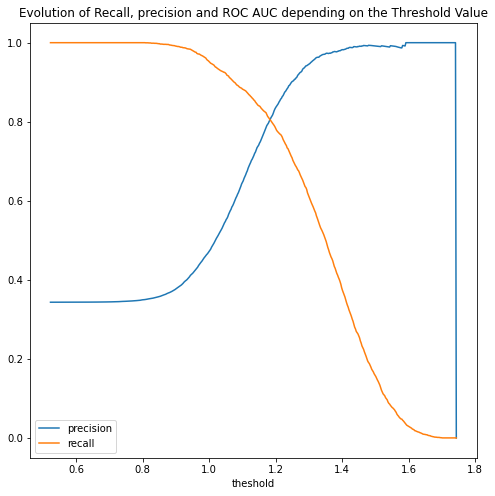

In [41]:
plt.figure(figsize=(8,8))
plt.plot(threshold, precision_list, label='precision')
plt.plot(threshold, recall_list, label='recall')
#plt.plot(threshold, roc_list, label='roc_auc')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

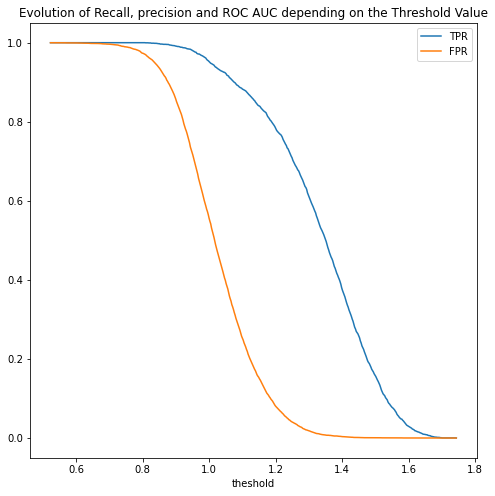

In [42]:
plt.figure(figsize=(8,8))
plt.plot(threshold, TPR_list, label='TPR')
plt.plot(threshold, FPR_list, label='FPR')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

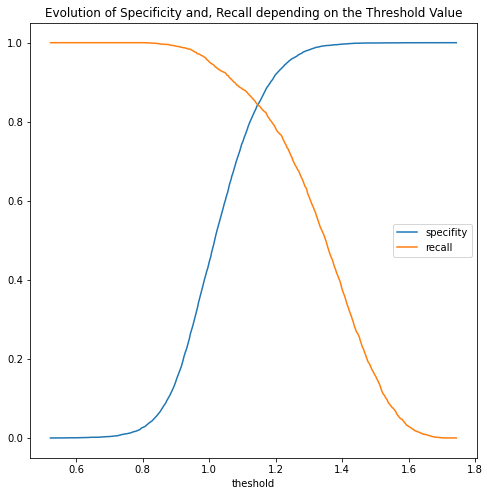

In [43]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='recall')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

No handles with labels found to put in legend.


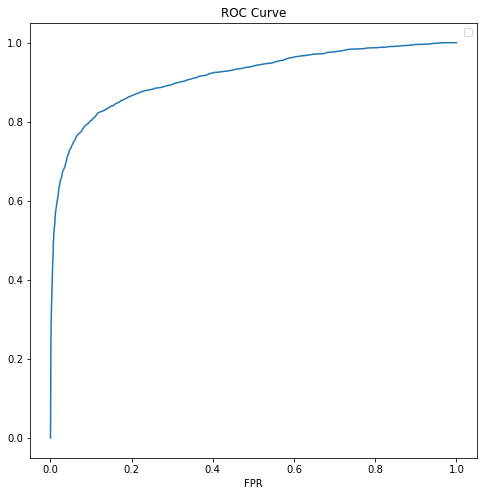

In [44]:
# ROC Curve
plt.figure(figsize=(8,8))
plt.plot(FPR_list, TPR_list)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.show()

No handles with labels found to put in legend.


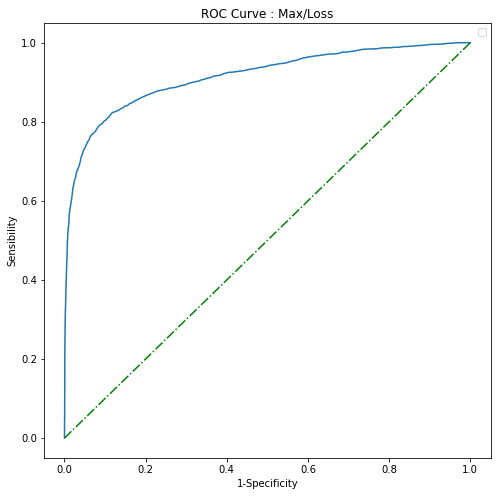

In [45]:
# ROC Curve
x = np.linspace(0,1,100)
y = x
plt.figure(figsize=(8,8))
plt.plot( 1- np.array(specifity_list) , sensitivity_list)
plt.plot(x, y,'-.g')
plt.legend()
plt.title('ROC Curve : Max/Loss')
plt.xlabel('1-Specificity')
plt.ylabel('Sensibility')

plt.show()

## Youden Index

In [46]:
df_metric = pd.DataFrame()
df_metric['threshold'] = threshold
df_metric['Recall'] = TPR_list
df_metric['FPR'] = FPR_list
df_metric['Precison'] = precision_list
df_metric['Specifity'] = specifity_list
df_metric['Sensitivity'] = sensitivity_list
df_metric['Recall/Specifity'] = np.array(TPR_list)/ np.array(specifity_list)

In [47]:
df_metric['YoudenIndex'] = df_metric['Sensitivity'] + df_metric['Specifity'] -1

+ Pr = TP / (TP + FP)
+ Recall = TP  / (TP + FN)


In [48]:
df_metric.head()

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
0,0.523042,1.0,0.999833,0.343527,0.000167,1.0,5990.0,0.000167
1,0.525486,1.0,0.999833,0.343527,0.000167,1.0,5990.0,0.000167
2,0.527931,1.0,0.999833,0.343527,0.000167,1.0,5990.0,0.000167
3,0.530376,1.0,0.999833,0.343527,0.000167,1.0,5990.0,0.000167
4,0.532821,1.0,0.999833,0.343527,0.000167,1.0,5990.0,0.000167


In [49]:
youden_threshold = df_metric[df_metric['YoudenIndex'] == max(df_metric['YoudenIndex'])]['threshold'].values

In [50]:
youden_threshold

array([1.1709013])

In [51]:
max(df_metric['YoudenIndex'])

0.705213858877751

In [52]:
df_metric[(df_metric['Recall'] < 1) & (df_metric['Recall'] > 0.85)]

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
117,0.809078,0.999681,0.969616,0.350408,0.030384,0.999681,32.901586,0.030065
118,0.811523,0.999681,0.967613,0.350879,0.032387,0.999681,30.866437,0.032068
119,0.813967,0.999681,0.965609,0.351351,0.034391,0.999681,29.068392,0.034072
120,0.816412,0.999681,0.964107,0.351706,0.035893,0.999681,27.851575,0.035574
121,0.818857,0.999362,0.962104,0.352108,0.037896,0.999362,26.370826,0.037258
...,...,...,...,...,...,...,...,...
248,1.129340,0.859923,0.187980,0.705313,0.812020,0.859923,1.058993,0.671943
249,1.131785,0.858009,0.183472,0.709873,0.816528,0.858009,1.050802,0.674536
250,1.134230,0.855137,0.178965,0.714286,0.821035,0.855137,1.041536,0.676172
251,1.136675,0.853542,0.173790,0.719860,0.826210,0.853542,1.033080,0.679752


In [53]:
#youden_threshold = -0.000012

In [54]:
classif_best_thr = []
pred_label = []
for i in range(df_all_test.shape[0]):
    if df_all_test.iloc[i,:]['MeanScoreAnomalyMap']  < youden_threshold:
        pred_label.append('Normal')
    else:
        pred_label.append('Tumor')

In [55]:
df_all_test['PredLabel'] = pred_label

In [56]:
df_all_test.head()

,file_path,binary_lab,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,BinaryLabels,Origin,PredLabel
0,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.767511,1.065712,Test,TNE1720,Normal,0.126613,0.0,Paris,Normal
1,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.114439,1.106141,Test,TNE1831,Tumoral,0.000079,1.0,Rotondo,Normal
2,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.380768,1.464499,Test,TNE1597,Tumoral,0.066270,1.0,Caen,Tumor
3,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,2.019160,1.052290,Test,TNE1560,Tumoral,0.010853,1.0,Caen,Normal
4,/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumo...,1,1.498796,1.017020,Test,TNE1574,Normal,0.390054,0.0,Caen,Normal


In [57]:
df_all_test.iloc[0,0]

'/gpfsscratch/rech/ohv/ueu39kt/KI67_Normal_Tumoral/TNE1720/Normal/TNE1720.svs_61953_6657.jpg'

In [58]:
df_all_test[(df_all_test['Class'] == 'Tumoral')].shape

(0, 11)

In [59]:
df_all_test[(df_all_test['Class'] == 'Normal')].shape

(5990, 11)

In [60]:
# True positive %
df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.8823038397328882

In [61]:
TP  = df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] 

In [66]:
# Faux Negatif %
df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumoral')].shape[0] /  df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.0

In [63]:
FN  = df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [71]:
# Vrai negatif %
df_all_test[(df_all_test['Class'] == 'Tumoral') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumoral')].shape[0]

0.8229100191448628

In [89]:
TN = df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [73]:
# Faux Positif % 
df_all_test[(df_all_test['Class'] == 'Tumoral') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumoral')].shape[0]

0.1770899808551372

In [74]:
FP = df_all_test[(df_all_test['Class'] == 'Tumoral') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0]

In [92]:
# Sensitivity current
#  Out of all the people that have the disease, how many got positive test results?
Sn  = TP / (TP + FN)
print('Sensitivity = '  , Sn)

Sensitivity =  0.872921320426905


In [93]:
# Specificity current
# Out of all the people that do not have the disease, how many got negative results?
Sp = TN / (TN + FP)
print('Specificity = '  , Sp)

Specificity =  0.87513397642015


In [94]:
# Pr current
# Out of all the examples that predicted as positive, how many are really positive?
Pr = TP / (TP + FP)
print('Precision = '  , Pr)


Precision =  0.9378666666666666


In [95]:

for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    print(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    TP  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0] 
    FN  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') & 
           (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    TN = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') & 
                (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    FP = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0]
    
    print('Precision =', TP / (TP + FP))
    print('Sensitivity  = ', TP / (TP + FN))
    print('Specificity = ', TN / (TN + FP))
    print('############################### \n')


TNEID =  TNE0008
Milan
Normal  191
Tumor  27
Precision = 0.8909090909090909
Sensitivity  =  0.5130890052356021
Specificity =  0.5555555555555556
############################### 

TNEID =  TNE1408
Lyon-CLB
Normal  123
Tumor  40
Precision = 0.9905660377358491
Sensitivity  =  0.8536585365853658
Specificity =  0.975
############################### 

TNEID =  TNE1417
Nice
Normal  417
Tumor  21
Precision = 0.9854014598540146
Sensitivity  =  0.9712230215827338
Specificity =  0.7142857142857143
############################### 

TNEID =  TNE1410
Lyon-CLB
Normal  156
Tumor  85
Precision = 0.96875
Sensitivity  =  0.9935897435897436
Specificity =  0.9411764705882353
############################### 

TNEID =  TNE0987
Paris
Normal  104
Tumor  40
Precision = 1.0
Sensitivity  =  0.9807692307692307
Specificity =  1.0
############################### 

TNEID =  TNE0227
Caen
Normal  143
Tumor  26
Precision = 1.0
Sensitivity  =  0.8251748251748252
Specificity =  1.0
############################### 

TNEID 

## Misclassified Tumor

In [96]:
miss_tumor = df_all_test[(df_all_test['Class'] == 'Tumor') 
                             &  (df_all_test['PredLabel'] == 'Normal')]

In [97]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
35,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.002000,1.307706,Test,TNE0869,Tumor,0.071237,Oslo,Normal
42,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.161311,1.238522,Test,TNE0863,Tumor,0.011576,Oslo,Normal
96,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.882506,1.376351,Test,TNE0869,Tumor,0.149302,Oslo,Normal
120,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150835,1.406839,Test,TNE0002,Tumor,0.013940,Milan,Normal
179,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150822,1.415939,Test,TNE0007,Tumor,0.013943,Milan,Normal


In [98]:
miss_tumor.shape
miss_tumor = miss_tumor.sample(frac=1).reset_index(drop=True)
miss_tumor = miss_tumor.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)

In [99]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
95,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.832269,1.102335,Test,TNE0008,Tumor,0.190648,Milan,Normal
61,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.172035,1.160400,Test,TNE0008,Tumor,0.009383,Milan,Normal
11,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.869986,1.187683,Test,TNE0869,Tumor,0.159134,Oslo,Normal
75,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.918521,1.195189,Test,TNE0869,Tumor,0.122767,Oslo,Normal
28,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.888352,1.197984,Test,TNE1417,Tumor,0.144818,Nice,Normal


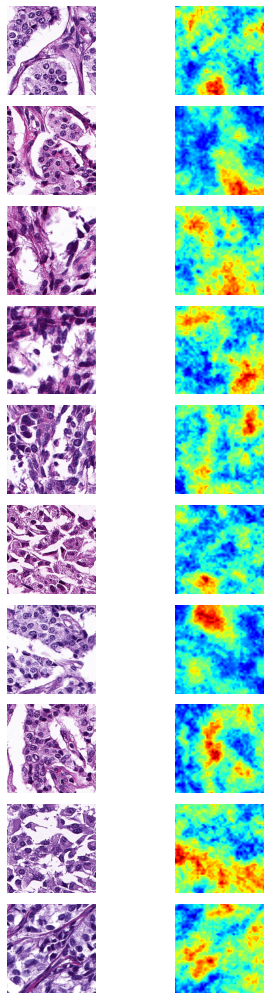

In [100]:
def plot_10_tiles(anom_path, miss_tumor):
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(6,14))  
    j = 0 
    i = 0
    for p in miss_tumor['FilesPath'].iloc[:10]:
        im = cv2.imread(p)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        anom_name_c = anom_path  +  str(p.split('/')[-1].split('.')[0]) + '.npy'
        anom_map_im  = np.load(anom_name_c)
        
        axes[i,0].imshow(im) 
        axes[i,0].axis('off')

        axes[i,1].imshow(anom_map_im, cmap = 'jet' ) 
        axes[i,1].axis('off')
        i +=1  
        
        fig.tight_layout()
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'

plot_10_tiles(anom_path, miss_tumor)

## Misclassified Normal

In [101]:
miss_normal = df_all_test[(df_all_test['Class'] == 'Normal') & 
                              (df_all_test['PredLabel'] == 'Tumor')]

In [102]:
miss_normal = miss_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)

In [103]:
miss_normal.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
5411,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.695850,1.829243,Test,TNE1508,Normal,0.182284,Turin,Tumor
146,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.457451,1.745131,Test,TNE1508,Normal,0.035550,Turin,Tumor
3445,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.459806,1.726488,Test,TNE1508,Normal,0.036444,Turin,Tumor
5363,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.445397,1.724153,Test,TNE1508,Normal,0.031150,Turin,Tumor
1202,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.201050,1.716684,Test,TNE0590,Normal,0.004604,Turin,Tumor


In [104]:
file_path_miss_norm = []
for i in range(miss_normal.shape[0]):
    file_path_miss_norm.append(miss_normal.iloc[i,0])
file_path_miss_norm

['/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_68737_67585.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33025.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_65665.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33409.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0590/Normal/TNE0590-001_15745_55681.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0227/Normal/TNE0227_14593_14977.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0008/Normal/TNE0008_7297_15361.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33793.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0034/Normal/TNE0034_23425_4993.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tum

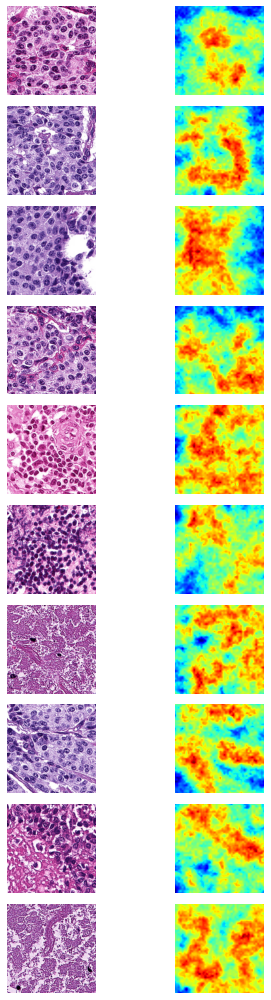

In [105]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, miss_normal)

## Most discriminant

In [109]:
best_normal = df_all_test[(df_all_test['Class'] == 'Normal') &  
                              (df_all_test['PredLabel'] == 'Normal')]
best_normal = best_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)
best_normal

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
4520,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.407757,0.888700,Test,TNE0869,Normal,0.741572,Oslo,Normal
6032,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301404,0.889985,Test,TNE1417,Normal,0.936054,Nice,Normal
5922,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301546,0.892775,Test,TNE1417,Normal,0.935778,Nice,Normal
1401,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.386648,0.909098,Test,TNE1508,Normal,0.778373,Turin,Normal
2289,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.661881,0.915648,Test,TNE1417,Normal,0.368475,Nice,Normal
...,...,...,...,...,...,...,...,...,...,...
4263,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.086086,1.424290,Test,TNE0227,Normal,0.033422,Caen,Normal
1293,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.211774,1.424321,Test,TNE0870,Normal,0.003264,Oslo,Normal
1889,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.155757,1.424505,Test,TNE0870,Normal,0.012802,Oslo,Normal
3201,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.240960,1.424777,Test,TNE0001,Normal,0.000781,Milan,Normal


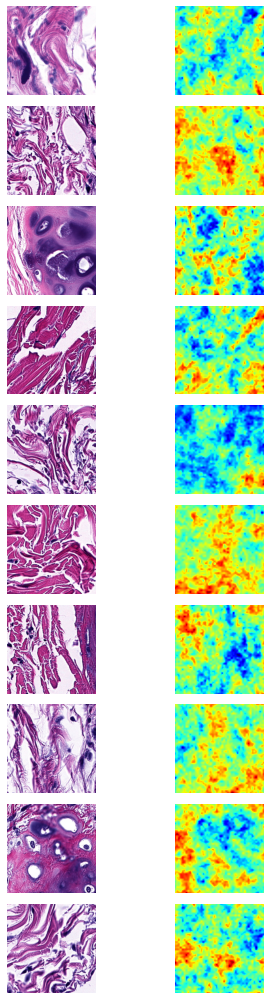

In [111]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, best_normal)

## Less discriminant

In [112]:
less_discriminant = df_all_test[(df_all_test['Class'] == 'Tumor')
                                    &  (df_all_test['PredLabel'] == 'Tumor')]
less_discriminant = less_discriminant.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)
less_discriminant.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
3161,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598805,1.959766,Test,TNE1408,Tumor,0.108835,Lyon-CLB,Tumor
1738,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.486123,1.936394,Test,TNE0892,Tumor,0.047185,Oslo,Tumor
2499,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598531,1.932246,Test,TNE0034,Tumor,0.108655,Melbourne,Tumor
5049,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.470331,1.924155,Test,TNE0987,Tumor,0.040573,Paris,Tumor
1044,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.569881,1.914446,Test,TNE1410,Tumor,0.090588,Lyon-CLB,Tumor


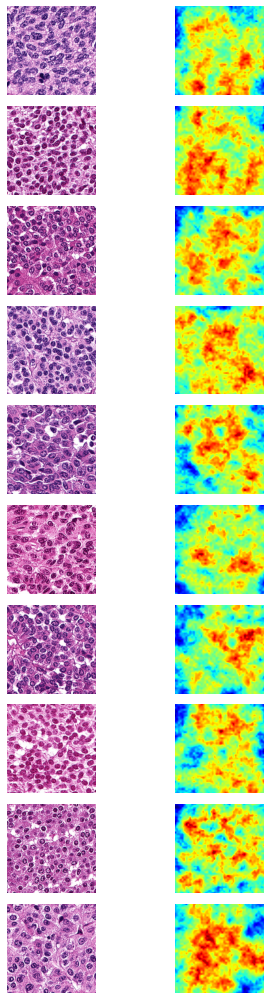

In [114]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'
plot_10_tiles(anom_path, less_discriminant)